In [2]:
# # <pip install import-ipynb> Allows you to import other ipynb files to a new jupyter notebook
# import import_ipynb
# from main import data

# Import other modules
import pandas as pd
import ast # Library for convert string representation of dict to a dict
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.misc import comb
import matplotlib.pyplot as plt

In [3]:
# Read the dataset
df = pd.read_csv('yelp_business.csv')

In [4]:
# Data Pre-processing / Cleaning Step
    # Remove unnecessary columns
clean_df = df.drop(columns=['address', 'city', 'hours', 'postal_code', 'review_count',
                            'stars', 'Standardized Stars'])
clean_df = clean_df.drop(clean_df.columns[0], axis=1)

    # Filter by Restaurants
clean_restaurants = clean_df[clean_df['categories'].str.contains("Restaurants") == True]

    # Filter by currently open restaurants
clean_restaurants = clean_restaurants[clean_restaurants['is_open'] == 1]

    # Drop "is_open" column because does not have meaning after the filter
clean_restaurants = clean_restaurants.drop(columns=['is_open'])
    
    # Organize order of columns
clean_restaurants = clean_restaurants[['business_id', 'name', 'attributes', 'categories', 'latitude', 'longitude',
                                       'state', 'KPI']].reset_index()
clean_restaurants = clean_restaurants.drop(columns=['index'])

    # Convert categories column instances to lists
clean_restaurants['categories'] = clean_restaurants['categories'].str.split(',')

    # Remove blank spaces in the beginning and the end of strings in the lists of categories column
clean_restaurants['categories'] = clean_restaurants['categories'].map(lambda l: list(map(str.strip, l)))

# Data Pre-processing / Encoding Step

    # Create encoding object
mlb = MultiLabelBinarizer()
    
    # Fit 'categories' column to encoding object
categories = pd.DataFrame(mlb.fit_transform(clean_restaurants['categories']), 
                       columns=mlb.classes_, 
                       index=clean_restaurants.index)
pd.set_option('display.max_columns', None)
categories.head()

,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airport Terminals,Airports,Airsoft,Alternative Medicine,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Assisted Therapy,Animal Physical Therapy,Animal Shelters,Antiques,Apartments,Appliances,Appliances & Repair,Aquarium Services,Aquariums,Arabian,Arcades,Archery,Argentine,Armenian,Art Classes,Art Galleries,Art Museums,Art Schools,Art Supplies,Arts & Crafts,Arts & Entertainment,Asian Fusion,Audio/Visual Equipment Rental,Australian,Austrian,Auto Customization,Auto Detailing,Auto Glass Services,Auto Insurance,Auto Parts & Supplies,Auto Repair,Auto Upholstery,Automotive,Baby Gear & Furniture,Bagels,Bakeries,Bangladeshi,Bankruptcy Law,Banks & Credit Unions,Bar Crawl,Barbeque,Barbers,Bars,Bartenders,Bartending Schools,Basque,Batting Cages,Beach Bars,Beaches,Beauty & Spas,Bed & Breakfast,Beer,Beer Bar,Beer Garden,Beer Gardens,Belgian,Bespoke Clothing,Beverage Store,Bike Rentals,Bike Repair/Maintenance,Bikes,Bingo Halls,Bistros,Blow Dry/Out Services,Boat Charters,Boat Dealers,Boat Repair,Boating,Bocce Ball,Body Shops,Books,Bookstores,Botanical Gardens,Bounce House Rentals,Bowling,Brasseries,Brazilian,Brazilian Jiu-jitsu,Breakfast & Brunch,Breweries,Brewpubs,Bridal,British,Bubble Tea,Buffets,Building Supplies,Burgers,Burmese,Bus Tours,Business Consulting,Butcher,CSA,Cabaret,Cafes,Cafeteria,Cajun/Creole,Calabrian,Cambodian,Campgrounds,Canadian (New),Candy Stores,Cannabis Clinics,Cannabis Collective,Cannabis Dispensaries,Cantonese,Car Dealers,Car Rental,Car Share Services,Car Wash,Car Window Tinting,Cardiologists,Cards & Stationery,Caribbean,Carpet Installation,Casinos,Caterers,Champagne Bars,Check Cashing/Pay-day Loans,Cheese Shops,Cheese Tasting Classes,Cheesesteaks,Chicken Shop,Chicken Wings,Chinese,Chiropractors,Chocolatiers & Shops,Christmas Trees,Churches,Churros,Cideries,Cigar Bars,Cinema,Climbing,Clothing Rental,Clowns,Club Crawl,Cocktail Bars,Coffee & Tea,Coffee & Tea Supplies,Coffee Roasteries,Coffeeshops,Colleges & Universities,Colombian,Comedy Clubs,Comfort Food,Comic Books,Commercial Truck Repair,Community Centers,Community Service/Non-Profit,Computers,Contractors,Convenience Stores,Conveyor Belt Sushi,Cooking Classes,Cooking Schools,Cosmetic Dentists,Cosmetic Surgeons,Cosmetics & Beauty Supply,Counseling & Mental Health,Country Clubs,Country Dance Halls,Couriers & Delivery Services,Courthouses,Creperies,Cuban,Cultural Center,Cupcakes,Currency Exchange,Custom Cakes,Czech,DJs,Dance Clubs,Dance Schools,Dance Studios,Day Camps,Day Spas,Delicatessen,Delis,Dentists,Department Stores,Desserts,Diagnostic Services,Dim Sum,Diners,Dinner Theater,Discount Store,Distilleries,Dive Bars,Divorce & Family Law,Do-It-Yourself Food,Doctors,Dog Walkers,Dominican,Donairs,Donuts,Door Sales/Installation,Drugstores,Dry Cleaning,Dry Cleaning & Laundry,Drywall Installation & Repair,Eatertainment,Education,Egyptian,Electricians,Electronics,Elementary Schools,Emergency Medicine,Empanadas,Employment Agencies,Engraving,Escape Games,Estate Liquidation,Estate Planning Law,Ethical Grocery,Ethiopian,Ethnic Food,Ethnic Grocery,Event Photography,Event Planning & Services,Eyebrow Services,Eyelash Service,Eyewear & Opticians,Falafel,Family Practice,Farmers Market,Farms,Fashion,Fast Food,Feng Shui,Festivals,Filipino,Financial Services,Fire Protection Services,Fireplace Services,Fish & Chips,Fitness & Instruction,Flea Markets,Flooring,Floral Designers,Florists,Flowers & Gifts,Fondue,Food,Food Banks,Food Court,Food Delivery Services,Food Stands,Food Tours,Food Trucks,Formal Wear,Foundation Repair,French,Fruits & Veggies,Funeral Services & Cemeteries,Fur Clothing,Furniture Rental,Furniture Repair,Furniture Reupholstery,Furniture Stores,Game Meat,Gardeners,Gas Stations,Gastropubs,Gay Bars,Gelato,General Dentistry,German

In [5]:
# Add KPI and names to categories table
categories['KPI'] = clean_restaurants['KPI']
categories['name'] = clean_restaurants['name']

# Export categories table to csv
categories.to_csv("categories_KPI.csv")

In [ ]:
# Convert attribute column instances to dicts
attr_clean_restaurants['attributes'] = clean_restaurants['attributes'].dropna().apply(ast.literal_eval)

# Splitting dict on 'attribute' column
attributes = attr_clean_restaurants['attributes'].apply(pd.Series)

In [ ]:
# Check out atribute dataframe sparsity
attributes.count()

In [24]:
# Add KPI and names to attributes table
attributes['KPI'] = clean_restaurants['KPI']
attributes['name'] = clean_restaurants['name']

# Export attributes table to csv
attributes.to_csv("attribute_KPI.csv")

In [6]:
# Slicing the independent variables from the dependent one 
X = categories.iloc[:, 0:738].values
y = categories.iloc[:, 738].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 3000, random_state = 0, verbose=2)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 3000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


building tree 2 of 3000
building tree 3 of 3000
building tree 4 of 3000
building tree 5 of 3000
building tree 6 of 3000
building tree 7 of 3000
building tree 8 of 3000
building tree 9 of 3000
building tree 10 of 3000
building tree 11 of 3000
building tree 12 of 3000
building tree 13 of 3000
building tree 14 of 3000
building tree 15 of 3000
building tree 16 of 3000
building tree 17 of 3000
building tree 18 of 3000
building tree 19 of 3000
building tree 20 of 3000
building tree 21 of 3000
building tree 22 of 3000
building tree 23 of 3000
building tree 24 of 3000
building tree 25 of 3000
building tree 26 of 3000
building tree 27 of 3000
building tree 28 of 3000
building tree 29 of 3000
building tree 30 of 3000
building tree 31 of 3000
building tree 32 of 3000
building tree 33 of 3000
building tree 34 of 3000
building tree 35 of 3000
building tree 36 of 3000
building tree 37 of 3000
building tree 38 of 3000
building tree 39 of 3000
building tree 40 of 3000
building tree 41 of 3000
building

KeyboardInterrupt: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished


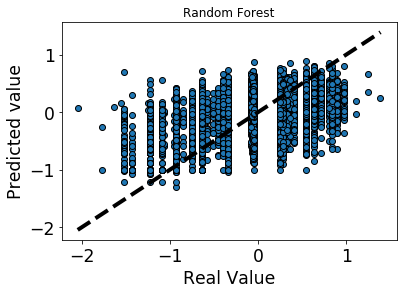

In [13]:
# Visualize the residuals
predicted = regressor.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.tick_params(labelsize = 'xx-large')
ax.set_xlabel('Real Value', fontsize = 'xx-large')
ax.set_ylabel('Predicted value', fontsize = 'xx-large')
plt.title('Random Forest')
plt.show()

In [16]:
# Fitting XGBoost to the Training set
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train, verbose_eval=True)

[16:18:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

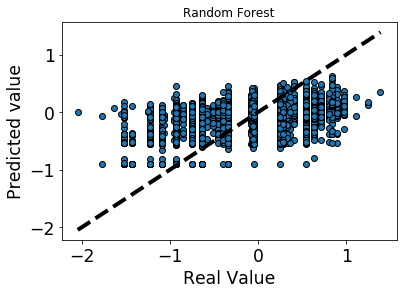

In [17]:
# Visualize the residuals
predicted_xgb = regressor_xgb.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_xgb, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.tick_params(labelsize = 'xx-large')
ax.set_xlabel('Real Value', fontsize = 'xx-large')
ax.set_ylabel('Predicted value', fontsize = 'xx-large')
plt.title('Random Forest')
plt.show()